<a href="https://colab.research.google.com/github/tanay0nSpark/ML_2022/blob/main/LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# This library helps us in creating statiscal model of the dataset
# By this lib. we can check p-value and 100 - pvalue will give us
# contribution factor of the column or feature corresponding to label or ouput feature
import statsmodels.formula.api as snf

In [3]:
# Importing modules from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
#Dataset
df = pd.read_csv('/content/Admission_Predict.csv')

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### EDA And Feature Engineering

In [16]:
# checking null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# Filling null values with mean
def fill_mean(df,col_Name):
  df[col_Name] = df[col_Name].fillna(df[col_Name].mean())
  return None

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [18]:
df.drop(columns = 'Serial No.',inplace = True)

In [19]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.columns[-1]

'Chance of Admit '

In [30]:
# splitting dataset in to features and target column
y = df['Chance of Admit ']
X = df.drop(columns='Chance of Admit ')

In [31]:
scaler = StandardScaler()

In [32]:
# StandardScaling of the dataset
arr = scaler.fit_transform(X)

In [33]:
# Means used for the features for transformation
scaler.mean_

array([316.8075  , 107.41    ,   3.0875  ,   3.4     ,   3.4525  ,
         8.598925,   0.5475  ])

In [34]:
df1 = pd.DataFrame(arr)

In [39]:
df1

,0,1,2,3,4,5,6
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.909112
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.909112
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,0.909112
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-1.099975


In [40]:
df1.describe()

,0,1,2,3,4,5,6
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-4.174439e-16,5.595524e-16,7.105427e-17,7.993606e-17,-1.332268e-16,7.771561e-16,-3.996803e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.339367e+00,-2.542098e+00,-1.827457e+00,-2.386613e+00,-2.733036e+00,-3.020504e+00,-1.099975e+00
25%,-7.685900e-01,-7.274920e-01,-9.520286e-01,-8.949798e-01,-5.042604e-01,-7.201909e-01,-1.099975e+00
50%,1.679859e-02,-6.763531e-02,-7.660001e-02,9.944220e-02,5.293342e-02,1.859559e-02,9.091117e-01
75%,7.149218e-01,7.571856e-01,7.988286e-01,5.966532e-01,6.101273e-01,7.783704e-01,9.091117e-01
max,2.023903e+00,2.076899e+00,1.674257e+00,1.591075e+00,1.724515e+00,2.218165e+00,9.091117e-01


## checking multicollinearity using statsmodels

In [41]:
## To check multicollinearity in the dataset
## Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF). 
## Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1. 
## As we see from the formula, greater the value of R-squared, greater is the VIF
## for more https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()

In [42]:
vif_df['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif_df['feature'] = X.columns
vif_df

,vif,feature
0,4.615516,GRE Score
1,4.288959,TOEFL Score
2,2.919606,University Rating
3,3.075504,SOP
4,2.431258,LOR
5,5.207403,CGPA
6,1.543312,Research


we can see there is no multicollinearity as 


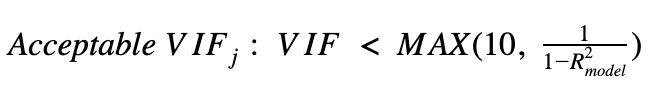

In [43]:
#Training and Testing data
# Train Test split
X_train,X_test,y_train,y_test = train_test_split(arr,y,test_size=0.25,random_state= 100)

In [46]:
print ("Shape of dataset: ")
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

Shape of dataset: 
(300, 7)
(300,)
(100, 7)
(100,)


In [47]:
# instance object of LinearRegression is created
lin = LinearRegression()

In [48]:
# training model to get slope and intercept for features of dataset
lin.fit(X_train,y_train)

LinearRegression()

In [49]:
# slopes
lin.coef_

array([ 0.01395232,  0.02144598,  0.00780718, -0.00911999,  0.0225274 ,
        0.07726781,  0.01248694])

In [50]:
# Intercept
lin.intercept_

0.7212381954918753

In [52]:
# transforming data for testing purpose
test1 = scaler.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])
test1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[1.76210664, 1.74697064, 0.79882862, 1.09386422, 1.16732114,
        1.76481828, 0.90911166]])

In [53]:
# Making prediction
lin.predict(test1)[0]

0.9535621121342654

In [54]:
test2 = scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [55]:
lin.predict(test2)[0]

0.8021573478285607

In [56]:
y_pred = lin.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
# MSE: 0.003702040155634241
# RMSE: 0.06084439296791645

0.003702040155634241
0.06084439296791645


In [58]:
import statsmodels.api as sm

In [59]:
result = sm.OLS(endog = y_test, exog = X_test).fit()

In [61]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                             0.3738
Date:                Tue, 25 Oct 2022   Prob (F-statistic):                       0.915
Time:                        16:11:29   Log-Likelihood:                         -109.25
No. Observations:                 100   AIC:                                      232.5
Df Residuals:                      93   BIC:                                      250.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1578      0.170      0.930      0.355      -0.179       0.495
x2            -0.0328      0.156     -0.210      0.834      -0.343       0.278
x3             0.1030      0.131      0.787      0.433      -0.157       0.363
x4            -0.0779      0.139     -0.559      0.578      -0.355       0.199
x5             0.0675      0.107      0.629      0.531      -0.146       0.281
x6            -0.1667      0.179     -0.931      0.354      -0.522       0.189
x7             0.0234      0.094      0.248      0.805      -0.164       0.211
==============================================================================
Omnibus:                        3.295   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.100
Skew:                          -0.430   Prob(JB):                        0.212
Kurtosis:                       2.941   Cond. No.                         6.27
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
print(result.rsquared, result.rsquared_adj)
# 0.027368220689575673 -0.0458406229144348

0.027368220689575673 -0.0458406229144348


Simply, when the adjusted R2, which is a measure of parsimony, is negative, it means that the model is over-parametrized; i.e., compared to the number of the data samples, the parameters are too many.

## Regularization : LASSO

In [62]:
# LassoCV is used for hyperparameter tuning to get the best alpha value
lasso_cv = LassoCV(cv=10,max_iter=200000,normalize=True)

In [63]:
# Training model on the dataset and alpha values are chosen implicitly
lasso_cv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=10, max_iter=200000, normalize=True)

In [64]:
# Best chosen alpha
lasso_cv.alpha_

0.0001693797486481399

In [65]:
# Training model using lasso, alpha value is selected from above
lasso= Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001693797486481399)

In [66]:
# R2 Score
lasso.score(X_test,y_test)

0.7943220693774816

With simple Linear Regression we have r-squared score R-squared (uncentered):	0.027 but with lasso it is 0.79

## Ridge

In [67]:
# RidgeCV is used to calculate alpha values
ridge_cv = RidgeCV(alphas=np.random.uniform(0,10,50), cv = 10,normalize = True)

In [68]:
# Training to get best alpha
ridge_cv.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

RidgeCV(alphas=array([9.08974794, 2.84775891, 7.58094429, 3.39501101, 3.3161841 ,
       3.3099241 , 4.0903829 , 0.98064155, 7.09860622, 9.08320265,
       0.64062428, 0.87818239, 0.05780284, 1.24952631, 2.49466269,
       8.31883805, 3.89168345, 3.91406449, 0.11333771, 0.59623311,
       7.04453381, 9.45955824, 6.87453847, 1.9273187 , 1.70405994,
       6.82293425, 6.36890664, 5.00009817, 7.85639121, 9.784796  ,
       0.61418166, 6.09728982, 5.71043741, 1.67217502, 4.56751912,
       0.60997092, 7.49300859, 5.74630494, 1.10650839, 6.41699242,
       5.19603626, 2.94062929, 6.8430411 , 1.42909814, 5.16018995,
       1.46610743, 1.79514819, 9.16731545, 6.0278626 , 9.61422088]),
        cv=10, normalize=True)

this generates 50 data points between 0 to 10

In [69]:
# Best aplpha
ridge_cv.alpha_

0.05780284168725891

In [70]:
# Using Above calculated alpha to train model using ridge
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train,y_train)

Ridge(alpha=0.05780284168725891)

In [71]:
# R2 score
ridge.score(X_test,y_test)

0.7933214896762667

## ElasticNet

In [72]:
# Using ElasticNetCV to calculate alpha
elastic_cv = ElasticNetCV(alphas=None,cv = 10)
elastic_cv.fit(X_train,y_train)

ElasticNetCV(cv=10)

In [77]:
# selected alpha
print(elastic_cv.alpha_)

0.0054595619637663574


In [78]:
print(elastic_cv.l1_ratio_)

0.5


In [79]:
# Training ElastiNet model using above selected alpha
alpha = elastic_cv.alpha_
l1_ratio = elastic_cv.l1_ratio_
elastic = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0054595619637663574)

In [80]:
# slope
elastic.coef_

array([ 0.01565212,  0.01891036,  0.00425269, -0.        ,  0.01830789,
        0.07516737,  0.01022107])

In [81]:
# R2 score
elastic.score(X_test,y_test)

0.8027890071466566

In [84]:
# saving trained model using pickle
pickle.dump(elastic,open('admission_model.pkl','wb'))

In [85]:
!ls -lrt

total 24
drwxr-xr-x 1 root root  4096 Oct 21 13:33 sample_data
-rw-r--r-- 1 root root 12903 Oct 25 14:46 Admission_Predict.csv
-rw-r--r-- 1 root root   744 Oct 25 16:25 admission_model.pkl


In [86]:
# Loading saved pickle file to make prediction on it
elastic_pkl = pickle.load(open('admission_model.pkl','rb'))

In [87]:
test2 = scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [90]:
elastic_pkl.predict(test2)[0]

0.7980381952356245